In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

## Define Logistic Function

In [2]:
def logistic(x):
    return 1 / (1 + torch.exp(-x))

def logistic_deriv_approx(x):
    out = logistic(x)
    out.backward()
    return x.grad.item()


Text(0.5, 1.0, 'Logistic Function')

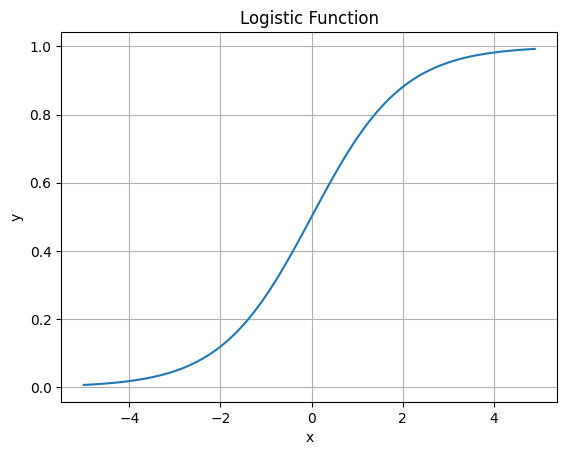

In [3]:
# Define the logistic function
def logistic(x):
    return 1 / (1 + torch.exp(-x))

# Apply the function
x_vals = torch.arange(-5,5,0.1)
y_vals = logistic(x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic Function")

## Compute Derivative using AutoDiff 

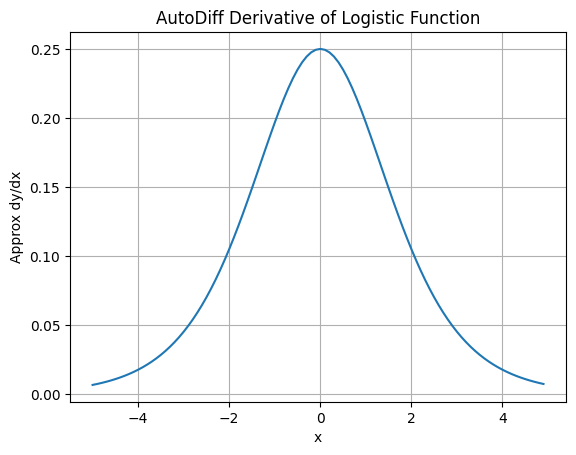

In [4]:
def logistic_deriv_approx(x):
    out = logistic(x)
    out.backward()
    return x.grad.item()

x_vals = np.arange(-5,5,0.1)
approx_dydx_vals = []

for xv in x_vals:
    x = torch.tensor(xv, requires_grad=True)
    grad_approx = logistic_deriv_approx(x)
    approx_dydx_vals.append(grad_approx)

approx_dydx_vals=np.array(approx_dydx_vals).reshape(-1,)

plt.figure()
plt.plot(x_vals, approx_dydx_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Approx dy/dx")
plt.title("AutoDiff Derivative of Logistic Function");

## Check Approximation Error

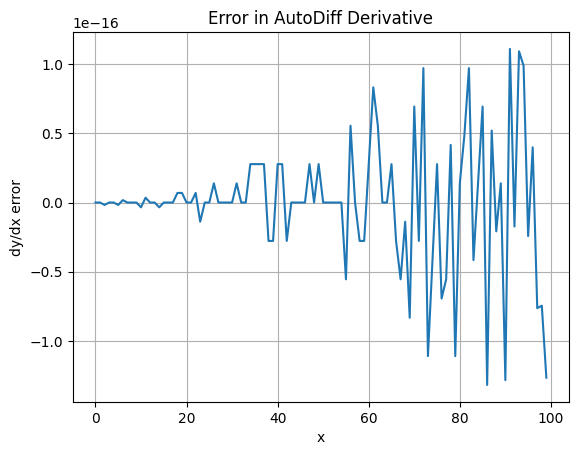

In [5]:
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

dydx_vals = logistic_derivative(torch.tensor(x_vals)).numpy()
error     = dydx_vals - approx_dydx_vals

plt.figure()
plt.plot(error)
plt.xlabel("x")
plt.ylabel("dy/dx error")
plt.title("Error in AutoDiff Derivative");
plt.grid(True)


# Logistic Regression Example

## Define the probabilistic classification function

In [6]:
def logistic_regression(theta,x):
    w = theta[:-1].reshape(-1,1)
    b = theta[-1]
    return logistic( w.T@x +b )


## Define the nll

In [7]:
def nll(theta,y,x):
    pygx = logistic_regression(theta,x)
    nll = y*torch.log(pygx) + (1-y)*torch.log(1-pygx)
    return nll

## Get the gradient

In [9]:
x     = torch.tensor([[1.0,2.0]]).T
y     = torch.tensor(1.0)
theta = torch.tensor([0.5,0.5,1.0], requires_grad=True)

out = nll(theta,y,x)
out.backward()
theta.grad


tensor([0.0759, 0.1517, 0.0759])